In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Read in the data
my_data = pd.read_csv('../results/seascape_lib_09252023.csv',index_col=0)

weinreich_mic = [0.088,1.4,0.063,32,0.13,3.6*10**2,0.18,3.6*10**2,0.088,23,1.4,
            3.6*10**2,1.4,2.1*10**3,0.8,2.9*10**3]

my_mic = []

for key in my_data.keys():
    my_mic.append(my_data[key]['mic'])

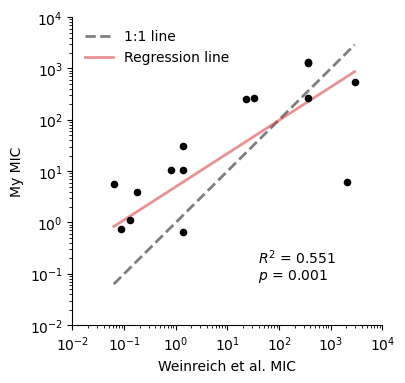

In [65]:
fig,ax  = plt.subplots(figsize=(4,4))

ax.scatter(weinreich_mic,my_mic,color='k',s=20)

# plot the 1:1 line
x = [np.min(weinreich_mic),np.max(weinreich_mic)]
y = [np.min(weinreich_mic),np.max(weinreich_mic)]
ax.plot(x,y,color='k',linestyle='--',linewidth=2,alpha=0.5,zorder=0,label='1:1 line')

ax.set_xscale('log')
ax.set_yscale('log')

# set x lim and y lim equal
ax.set_xlim([0.01,10000])
ax.set_ylim([0.01,10000])

ax.set_xlabel('Weinreich et al. MIC')
ax.set_ylabel('My MIC');

# calculate correlation

my_mic_log = np.log10(my_mic)
weinreich_mic_log = np.log10(weinreich_mic)

res = stats.linregress(weinreich_mic_log,my_mic_log)

# plot the regression line
# x = np.linspace(np.min(my_mic_log),np.max(my_mic_log),100)
x = np.log10(x)
y = res.intercept + res.slope*x
ax.plot(10**x,10**y,color='tab:red',linewidth=2,alpha=0.5,zorder=0,label='Regression line')

ax.legend(frameon=False)

# annotate the plot
ax.text(0.6,0.2,'$R^{2}$ = ' + str(np.round(res.rvalue**2,3)),transform=ax.transAxes)
ax.text(0.6,0.15,'$p$ = ' + str(np.round(res.pvalue,4)),transform=ax.transAxes)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

In [49]:
res

LinregressResult(slope=0.8505513575635752, intercept=-0.2352349365879829, rvalue=0.7420953701281274, pvalue=0.0009960995990487395, stderr=0.20532523793229232, intercept_stderr=0.3814843885736106)

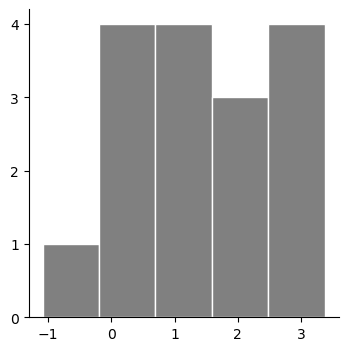

In [44]:
diff = np.array(my_mic) - np.array(weinreich_mic)

diff = np.log10(np.abs(diff))

fig,ax = plt.subplots(figsize=(4,4))

ax.hist(diff,bins=5,color='gray',edgecolor='w')

ax.set_yticks(np.arange(5));

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)